# 1. Illustration of the Embedding process

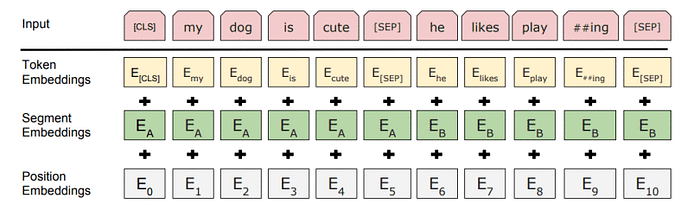

In [3]:
from IPython.display import Image
Image(filename='./samples/BERT-embeddings-2.png')

## Summary
- bert input embedding: A table lookup operation
    - token embeddings: token number
    - segment embeddings: sentence number
    - position embeddings: absolute position number in all the sentence
- post processing
    - layer norm
    - dropout

In [4]:
from transformers import BertTokenizer, BertModel

import torch
from torch import nn

In [5]:
model_name = 'bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [14]:
test_sentence = 'This is a test sentence'

input = tokenizer(test_sentence, return_tensors='pt')

# token_type_ids: first sentence->0; second sentence->1
# attention_mask: if padding
input

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 6251,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [15]:
input_ids = input['input_ids']
token_type_ids = input['token_type_ids']

pos_ids = torch.arange(input_ids.shape[1])
pos_ids

tensor([0, 1, 2, 3, 4, 5, 6])

# 2. Embedding details

## (1) token embedding

In [16]:
token_embed = model.embeddings.word_embeddings(input_ids)

In [22]:
token_embed

tensor([[[ 1.3630e-02, -2.6490e-02, -2.3503e-02,  ...,  8.6805e-03,
           7.1340e-03,  1.5147e-02],
         [-5.7095e-02,  1.5283e-02, -4.6868e-03,  ..., -3.2484e-03,
           9.7317e-05,  9.4175e-03],
         [-3.6044e-02, -2.4606e-02, -2.5735e-02,  ...,  3.3691e-03,
          -1.8300e-03,  2.6855e-02],
         ...,
         [ 2.3670e-02, -6.1351e-02, -2.9575e-02,  ..., -1.0239e-02,
          -7.2316e-03, -1.1745e-01],
         [ 3.2079e-02,  6.3135e-03, -6.4352e-03,  ..., -1.1689e-03,
          -1.0810e-01, -8.9524e-02],
         [-1.4521e-02, -9.9615e-03,  6.0263e-03,  ..., -2.5035e-02,
           4.6379e-03, -1.5378e-03]]], grad_fn=<EmbeddingBackward0>)

## (2) segment type embedding

In [18]:
seg_embed = model.embeddings.token_type_embeddings(token_type_ids)

In [23]:
seg_embed

tensor([[[ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         ...,
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086]]],
       grad_fn=<EmbeddingBackward0>)

## (3) position embedding

In [20]:
pos_embed = model.embeddings.position_embeddings(pos_ids)

In [21]:
pos_embed

tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        ...,
        [-5.6087e-03, -1.0445e-02, -7.2288e-03,  ...,  2.0837e-02,
          3.5402e-03,  4.7708e-03],
        [-3.0871e-03, -1.8956e-02, -1.8930e-02,  ...,  7.4045e-03,
          2.0183e-02,  3.4077e-03],
        [ 6.4257e-03, -1.7664e-02, -2.2067e-02,  ...,  6.7531e-04,
          1.1108e-02,  3.7521e-03]], grad_fn=<EmbeddingBackward0>)

## (4) input embedding

In [24]:
input_embed = token_embed + seg_embed + pos_embed.unsqueeze(0)

In [25]:
input_embed

tensor([[[ 0.0316, -0.0411, -0.0564,  ...,  0.0021,  0.0044,  0.0219],
         [-0.0489,  0.0285, -0.0204,  ...,  0.0190,  0.0265, -0.0045],
         [-0.0469, -0.0156, -0.0336,  ...,  0.0117,  0.0135,  0.0109],
         ...,
         [ 0.0185, -0.0608, -0.0331,  ...,  0.0040, -0.0071, -0.1213],
         [ 0.0294, -0.0017, -0.0217,  ..., -0.0004, -0.0913, -0.0948],
         [-0.0077, -0.0166, -0.0123,  ..., -0.0310,  0.0124, -0.0064]]],
       grad_fn=<AddBackward0>)